### Introduction

This notebook presents a solution to the Spaceship Titanic problem from Kaggle (competition link). The objective is to build a machine learning model to classify whether passengers were transported to another dimension during the spaceship’s journey.

We will explore the dataset, preprocess it to handle missing values and categorical variables, and implement multiple classification algorithms including Logistic Regression, Decision Trees, Support Vector Machines, and k-Nearest Neighbors. Initially, models will be trained with default parameters, followed by hyperparameter tuning to optimize performance.

In [632]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Data Reading

In [506]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [510]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Data Preprocessing

In [515]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [517]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [521]:
df_train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [523]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna('Earth')
df_test['HomePlanet'] = df_test['HomePlanet'].fillna('Earth')

In [525]:
df_train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [527]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(False)
df_train['CryoSleep'] = df_train['CryoSleep'].replace({True:1, False:0}).astype(int)

df_test['CryoSleep'] = df_test['CryoSleep'].fillna(False)
df_test['CryoSleep'] = df_test['CryoSleep'].replace({True:1, False:0}).astype(int)

In [529]:
df_train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [531]:
df_train['Destination'] = df_train['Destination'].fillna('TRAPPIST-1e')
df_test['Destination'] = df_test['Destination'].fillna('TRAPPIST-1e')

In [533]:
df_train['Transported'].value_counts() # данные сбалансированны

Transported
True     4378
False    4315
Name: count, dtype: int64

In [535]:
pd.set_option('future.no_silent_downcasting', True)
df_train['Transported'] = df_train['Transported'].replace({True:1, False:0}).astype(int)
df_test['Transported'] = df_test['Transported'].replace({True:1, False:0}).astype(int)

KeyError: 'Transported'

In [537]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [539]:
df_train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [541]:
df_train['VIP'] = df_train['VIP'].fillna(False)
df_train['VIP'] = df_train['VIP'].replace({True:1, False:0}).astype(int)

df_test['VIP'] = df_test['VIP'].fillna(False)
df_test['VIP'] = df_test['VIP'].replace({True:1, False:0}).astype(int)

In [543]:
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in amenities:
    df_train[i] = df_train[i].fillna(0)
    df_test[i] = df_test[i].fillna(0)

In [545]:
df_train['Name'] = df_train['Name'].fillna('Name') # в дальнейшем удалим эту строчку 

## Data Visualisation

Text(0.5, 1.0, 'HomePlanet/Transported')

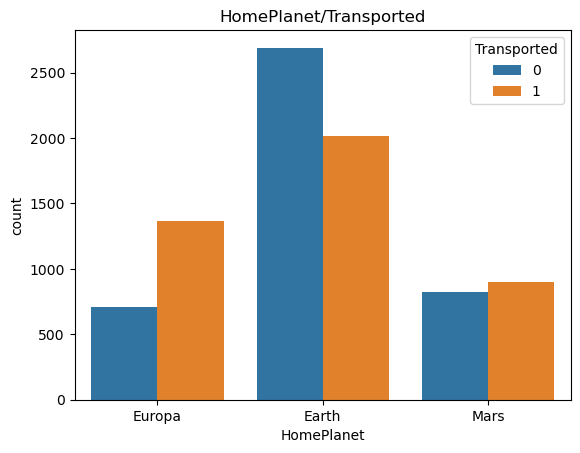

In [378]:
sns.countplot(data = df_train, x = 'HomePlanet', hue = 'Transported')
plt.title('HomePlanet/Transported')

Text(0.5, 1.0, 'CryoSleep/Transported')

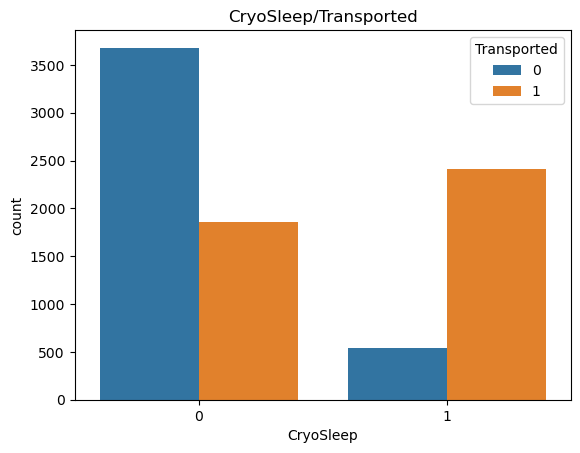

In [380]:
sns.countplot(data = df_train, x = 'CryoSleep', hue = 'Transported')
plt.title('CryoSleep/Transported')

Text(0.5, 1.0, 'Destination/Transported')

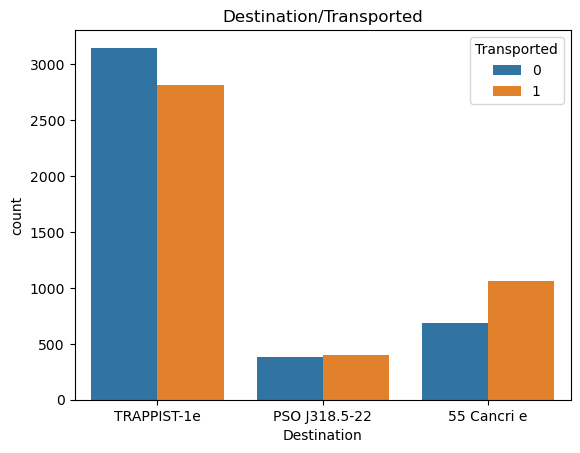

In [382]:
sns.countplot(data = df_train, x = 'Destination', hue = 'Transported')
plt.title('Destination/Transported')

Text(0.5, 1.0, 'VIP/Transported')

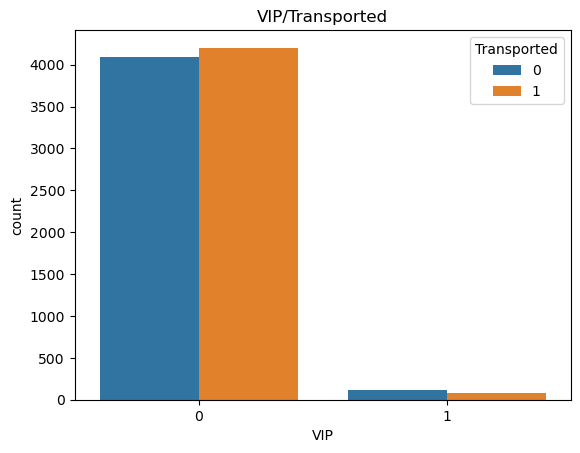

In [384]:
sns.countplot(data = df_train, x = 'VIP', hue = 'Transported')
plt.title('VIP/Transported')

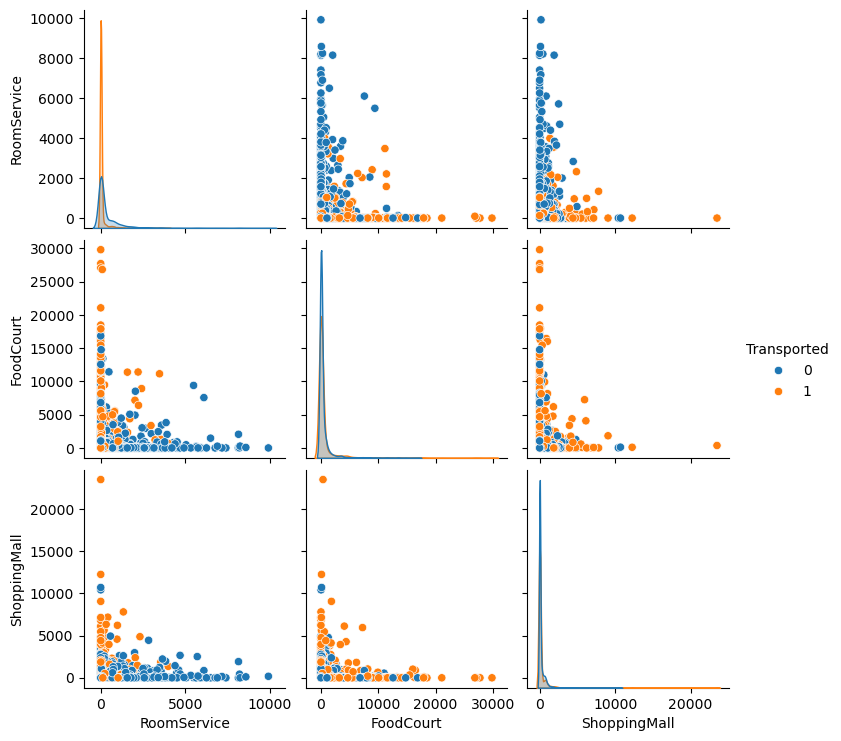

In [386]:
sns.pairplot(df_train , hue = 'Transported', vars = ['RoomService', 'FoodCourt', 'ShoppingMall'])

<Axes: xlabel='Transported', ylabel='Age'>

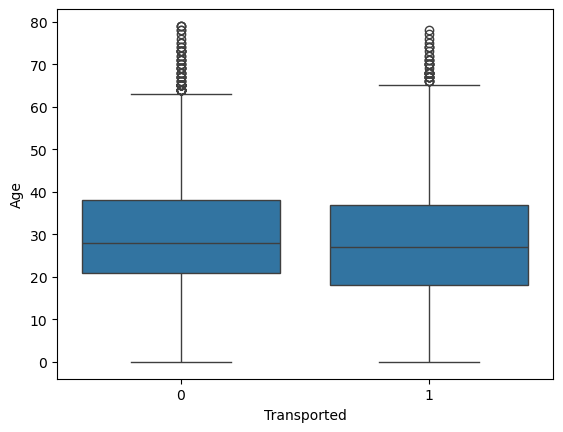

In [388]:
sns.boxplot(data = df_train , x = 'Transported', y = 'Age')

## Categorical Encoding

In [549]:
df_train.set_index('PassengerId', inplace = True)
df_test.set_index('PassengerId', inplace = True)

KeyError: "None of ['PassengerId'] are in the columns"

In [551]:
df_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,1,C/0/S,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,0,NaN,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,1,D/296/P,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [553]:
df_train = df_train.drop(columns = ['Name','Cabin']) 
df_test = df_test.drop(columns = ['Name','Cabin'])

In [555]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 815.0+ KB


In [559]:
ohe = OneHotEncoder(sparse_output = False)
ohe_data = ohe.fit_transform(df_train[['HomePlanet', 'Destination']])
ohe_df = pd.DataFrame(ohe_data, columns = ohe.get_feature_names_out(['HomePlanet', 'Destination']))
ohe_df.reset_index(drop = True, inplace = True)
df_encode = pd.concat([df_train.reset_index(drop=True), ohe_df], axis = 1)
df_encode.drop(['HomePlanet', 'Destination'], axis = 1, inplace = True)
df_encode

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,1.0,0.0,1.0,0.0,0.0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0.0,1.0,0.0,1.0,0.0,0.0


In [561]:
ohe_test = OneHotEncoder(sparse_output = False)
ohe_data_test = ohe_test.fit_transform(df_test[['HomePlanet', 'Destination']])
ohe_df_test = pd.DataFrame(ohe_data_test, columns = ohe_test.get_feature_names_out(['HomePlanet', 'Destination']))
ohe_df_test.reset_index(drop = True, inplace = True)
df_encode_test = pd.concat([df_test.reset_index(drop=True), ohe_df_test], axis = 1)
df_encode_test.drop(['HomePlanet', 'Destination'], axis = 1, inplace = True)
df_encode_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,1.0,0.0,0.0,0.0,0.0,1.0
4274,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4275,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0.0,1.0,0.0,0.0,0.0,1.0


### Data Spliting

In this task, the objective is classification. I will use Logistic Regression, Decision Tree, SVC, and K-Nearest Neighbors (KNN).

First, I will train the models with default parameters, and then, using hyperparameter tuning, I will attempt to improve the performance of the models.

In [563]:
X = df_encode.drop(['Transported'], axis=1)
y = df_encode['Transported']

In [565]:
scaler = StandardScaler()
train_scaler = scaler.fit_transform(X)
test_scaler = scaler.transform(df_encode_test)

train_scaler_df = pd.DataFrame(train_scaler , columns = X.columns , index = X.index)
test_scaler_df = pd.DataFrame(test_scaler, columns = df_encode_test.columns, index = df_encode_test.index)

In [567]:
X_train , X_test , y_train, y_test = train_test_split(X, y, train_size=0.75 , random_state= 42)

### Model Training

In [569]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(accuracy_score(pred_logreg, y_test))

0.7759889604415824


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [571]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(pred_dtc, y_test))

0.7276908923643054


In [573]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(accuracy_score(pred_svc, y_test))

0.7796688132474701


In [575]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(pred_knn, y_test))

0.7727690892364305


In [578]:
parametrs_logreg = {'penalty':['l1','l2'],'C': np.arange(0.1, 10, 0.1), 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']}
grid_param = GridSearchCV(logreg, parametrs_logreg, cv=3, scoring='accuracy')
grid_param.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             scoring='accuracy')

In [580]:
grid_param.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [582]:
logreg = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg')
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(accuracy_score(pred_logreg, y_test))

0.7792088316467342


In [584]:
parametrs_dtc = {'criterion':['gini','entropy','log_loss'],
                'max_depth':np.arange(1,10),
                'min_samples_split': np.arange(2,20,2),
                'max_features': ['sqrt', 'log2', None]}
grid_param = GridSearchCV(dtc, parametrs_dtc, cv=3, scoring='accuracy')
grid_param.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='accuracy')

In [586]:
grid_param.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': None,
 'min_samples_split': 12}

In [588]:
dtc = DecisionTreeClassifier(criterion = 'log_loss',max_depth = 7, max_features = None ,min_samples_split = 12)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(pred_dtc, y_test))

0.7621895124195032


In [630]:
parametrs_svc = {'C': [0.01, 0.1,1,10,100],
                'kernel':['rbf']}
grid_param = GridSearchCV(svc, parametrs_svc, cv=3, scoring='accuracy', n_jobs = -1)
grid_param.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(C=100), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy')

In [624]:
grid_param.best_params_


{'C': 200, 'kernel': 'rbf'}

In [628]:
svc = SVC(C = 100)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(accuracy_score(pred_svc, y_test))

0.7801287948482061


In [596]:
parametrs_knn = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15,17,19],
                 'weights': ['uniform', 'distance'],
                 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                'metric': ['euclidean', 'manhattan','minkowski'],
                'n_jobs': [-1, 1]}
grid_param = GridSearchCV(knn, parametrs_knn, cv=3, scoring='accuracy', n_jobs = -1)
grid_param.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_jobs': [-1, 1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [598]:
grid_param.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_jobs': -1,
 'n_neighbors': 19,
 'weights': 'uniform'}

In [600]:
knn = KNeighborsClassifier(algorithm = 'brute', metric = 'manhattan', n_neighbors = 19, weights='uniform', n_jobs = -1 )
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(pred_knn, y_test))

0.7764489420423183


### Best Model

In [602]:
svc = SVC(C = 100 )
svc.fit(X, y)
pred_svc = svc.predict(df_encode_test)

In [608]:
pred_svc_bool = [True if pred == 1 else False for pred in pred_svc]
result_df = pd.DataFrame({
    'PassengerId': df_test.index,  
    'Transported': pred_svc_bool   
})

result_df.to_csv('submission.csv', index=False)